### Challenge
    
1.Undistort the image

2.Convert to grayscale

3.Find the chessboard corners

4.Draw corners

5.Define 4 source points 
    (the outer 4 corners detected in the chessboard pattern)
    
6.Define 4 destination points (must be listed in the same order as src points!)

7.Perspective Transformation

    a.Use cv2.getPerspectiveTransform() to get M, the transform matrix
    
    b.Use cv2.warpPerspective() to apply M and warp your image to a top-down view


In [8]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

%matplotlib inline

In [9]:
dist_pickle = pickle.load(open("wide_dist_pickle.p","rb"))

In [10]:
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]

In [11]:
# Read the image

img = cv2.imread("test_image2.png")

In [12]:
# Define the corners
nx = 8
ny = 6

In [13]:
def corners_unwarp(img, nx, ny, mtx, dist):
    # dist = distortion coefficients
    
    # undistort
    undistort = cv2.undistort(img, mtx, dist, None, mtx)
    
    # gray
    gray = cv2.cvtColor(undistort, cv2.COLOR_BGR2GRAY)
    
    
    image_size = (img.shape[1], img.shape[0])
    
    # find corners
    ret, corners = cv2.findChessboardCorners(gray,
                                            (nx, ny),
                                             None)
    # if corners
    if ret:
        # draw corners
        cv2.drawChessboardCorners(img,
                                 (nx, ny),
                                  corners,
                                  ret)
        src = np.float32([
            corners[0],
            corners[nx-1],
            corners[-1],
            corners[-nx]
        ])
        
        offset = 100
        
        dst = np.float32([
            [
                [offset, offset],
                [image_size[0]-offset, offset],
                [image_size[0]-offset, image_size[1]-offset],
                [offset, image_size[1]-offset]
            ]
        ])
        
        
        M = cv2.getPerspectiveTransform(src, dst)
        warped = cv2.warpPerspective(undistort, M, image_size)
        
        return warped, M
    
    # delete the next two lines
    M = None
    warped = np.copy(img)
    return warped, M

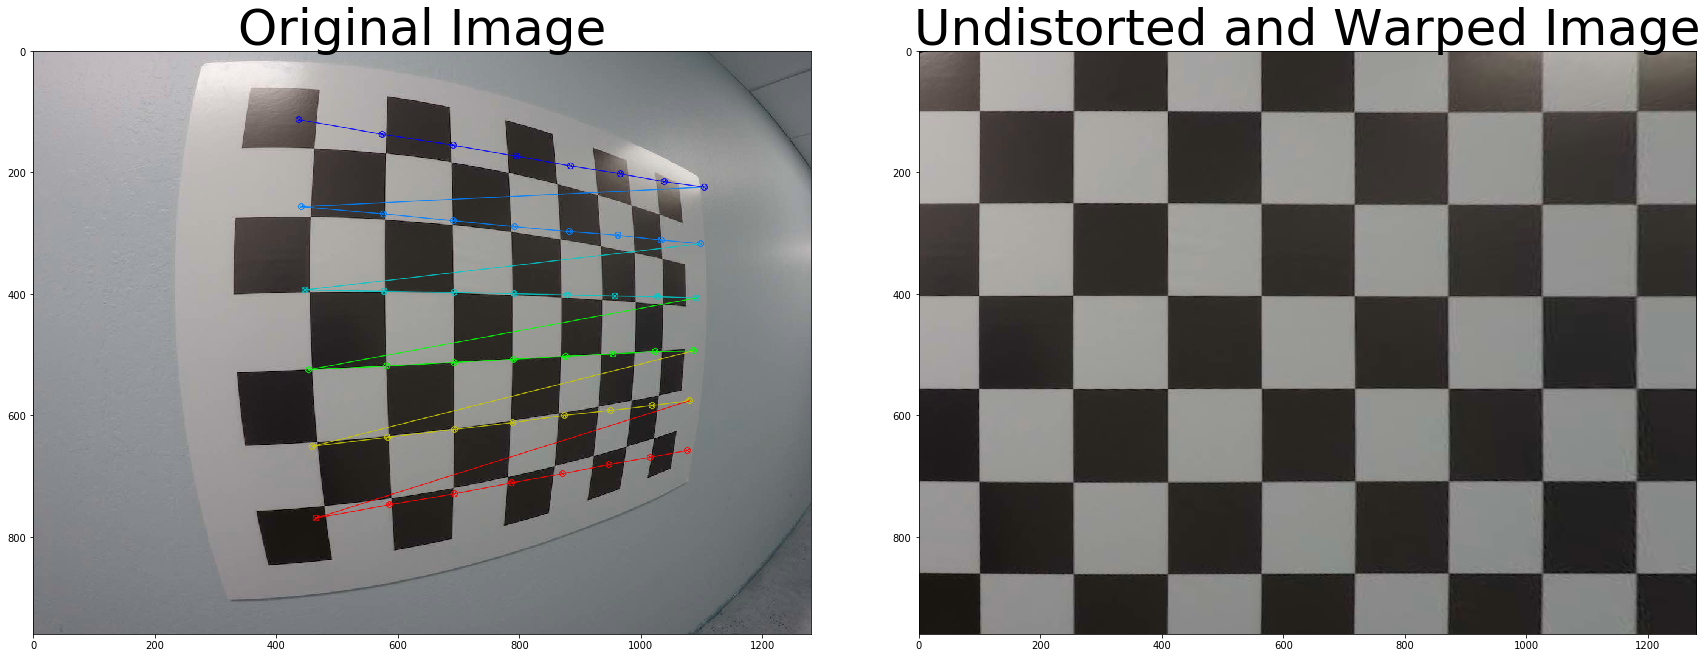

In [14]:
top_down, perspective_M = corners_unwarp(img, nx, ny, mtx, dist)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(top_down)
ax2.set_title('Undistorted and Warped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)